# Week 7 : Information Extraction

In [140]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

#All these packages need to be installed from pip
#For NLP
import nltk

import numpy as np #For arrays
import pandas as pd #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

import lucem_illud.stanford as stanford

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import matplotlib.pyplot as plt
from wordcloud import WordCloud


### The corpus I'm using is a set of interviews of musicians from Rolling Stone magazine.

# Exercise 1

In the cells immediately following, perform POS tagging on a meaningful (but modest) subset of a corpus associated with your final project. Examine the list of words associated with at least three different parts of speech. Consider conditional frequencies (e.g., adjectives associated with nouns of interest or adverbs with verbs of interest). What do these distributions suggest about your corpus?

In [3]:
# import data
df = pd.read_csv("week7.csv",encoding = "ISO-8859-1")

In [4]:
%%time
redditTopScores = df
redditTopScores['sentences'] = redditTopScores['text'].apply(lambda x: [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])
redditTopScores['POS_sents'] = redditTopScores['sentences'].apply(lambda x: stanford.postTagger.tag_sents(x))

### First, I look at the top 20 nouns that appear in my corpus. Unsurprisingly, the most frequently occuring nouns are 'band', 'album' and 'music'.

In [214]:
nouns = top_20('NN')
for word,count in nouns:
    if word in ["\x89ÛÒ", ")", "]", "nbsp" ]:
        nounds = nouns.remove((word,count))
nouns[:20]

[('band', 55),
 ('album', 38),
 ('music', 35),
 ('time', 26),
 ('year', 23),
 ('song', 22),
 ('show', 21),
 ('thing', 18),
 ('amp', 17),
 ('rock', 17),
 ('lot', 17),
 ('way', 17),
 ('something', 15),
 ('record', 14),
 ('everything', 14),
 ('tour', 12),
 ('night', 12),
 ('guy', 11),
 ('label', 11),
 ('nothing', 11)]

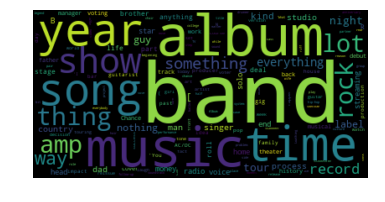

In [215]:
make_wc(nouns)

### Now, I look at the top 20 verbs that appear in my corpus. Once we get past the very common verbs like 'be' and 'do' - we see several verbs that have to do with music - 'sing', 'play', 'record', 'write'!

In [168]:
verbs = top_20('VB')
verbs[:20]

[('be', 48),
 ('do', 34),
 ('have', 27),
 ('go', 20),
 ('make', 16),
 ('say', 15),
 ('know', 15),
 ('get', 15),
 ('play', 13),
 ('sing', 9),
 ('come', 8),
 ('see', 8),
 ('want', 8),
 ('keep', 6),
 ('give', 6),
 ('think', 6),
 ('take', 6),
 ('work', 5),
 ('record', 4),
 ('write', 4)]

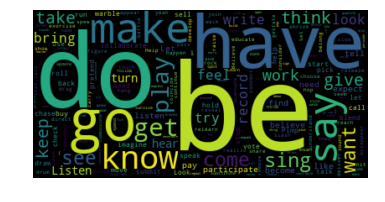

In [169]:
make_wc(verbs)

### Here's a list of the top 20 adjectives. It's hard to make sense of these without exploring the nouns / verbs they are collocated with. We will explore the adjectives associated with 'music' and 'album'.

In [194]:
adjectives = top_20('JJ')
adjectives[:20]

[('first', 26),
 ('different', 16),
 ('own', 12),
 ('good', 11),
 ('new', 11),
 ('great', 10),
 ('last', 9),
 ('big', 8),
 ('right', 8),
 ('Dead', 8),
 ('same', 8),
 ('many', 8),
 ('much', 8),
 ('few', 7),
 ('musical', 7),
 ('several', 7),
 ('original', 7),
 ('next', 7),
 ('major', 6),
 ('only', 6)]

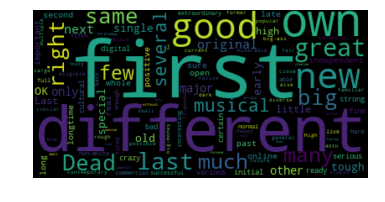

In [171]:
make_wc(adjectives)

### Now, I look at the adjectives that are used with the words 'music' and 'album'. A very millenial appearance in this list is 'subscription-best'. I was intrigued by the appearance of 'Dead' but it looks like Dead is the name of a band(!). 

In [207]:
NTarget = 'JJ'
Word = 'music'
NResults = set()
for entry in redditTopScores['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print("Adjectives associated with 'music': ")
for word in NResults:
    print(word)

Adjectives associated with 'music': 
own
rough
good
Dead
commercial
subscription-based
contemporary


In [198]:
NTarget = 'JJS'
Word = 'music'
NResults = set()
for entry in redditTopScores['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print("Superlative adjectives associated with 'music': ")
for word in NResults:
    print(word)    

Superlative adjectives associated with 'music': 
best


In [200]:
NTarget = 'JJ'
Word = 'album'
NResults = set()
for entry in redditTopScores['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print("Adjectives associated with 'album': ")
for word in NResults:
    print(word)  

Adjectives associated with 'album': 
sixth-bestselling
second
first
last
full-length


In [208]:
NTarget = 'JJS'
Word = 'album'
NResults = set()
for entry in redditTopScores['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue
print("Superlative adjectives associated with 'album': ")
for word in NResults:
    print(word)   

Superlative adjectives associated with 'album': 
best


### When I look at verbs associated with 'music' I see 'sell' and 'pop' - the former of which makes sense and the latter should probably appear as an adjective in this context (and I presume it would if it was used in the full form - popular) but the dictionary meaning of 'pop' is correctly classified as a verb.

In [192]:
NTarget = 'VB'
Word = 'music'
NResults = set()
for entry in redditTopScores['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)     

{'sell', 'pop'}


# Exercise 2

In the cells immediately following, perform NER on a (modest) subset of your corpus of interest. List all of the different kinds of entities tagged? What does their distribution suggest about the focus of your corpus? For a subset of your corpus, tally at least one type of named entity and calculate the Precision, Recall and F-score for the NER classification just performed (using your own hand-codings as "ground truth").

In [10]:
%%time
redditTopScores['classified_sents'] = redditTopScores['sentences'].apply(lambda x: stanford.nerTagger.tag_sents(x))

CPU times: user 111 ms, sys: 185 ms, total: 296 ms
Wall time: 31.7 s


In [252]:
l = []
for i in range(10):
    l.extend(redditTopScores['classified_sents'][i])

flatten = lambda l: [item for sublist in l for item in sublist]
tuples = flatten(l)

### The tags observed are 

* Location
* Object
* Organization
* Person 

In [259]:
tags = []
counts = dict.fromkeys(["tag"])

for word,tag in tuples:
    if tag in counts:
        counts[tag] += 1
    else:
        counts[tag] = 1
        
    if v not in tags:
        tags.append(v)
counts

{'LOCATION': 116, 'O': 15496, 'ORGANIZATION': 117, 'PERSON': 486, 'tag': None}

In [222]:
entityCounts = {}
for entry in redditTopScores['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if ent in entityCounts:
                entityCounts[ent] += 1
            else:
                entityCounts[ent] = 1
sortedEntities = sorted(entityCounts.items(), key = lambda x: x[1], reverse = True)
sortedEntities[:10]

[(',', 908),
 ('.', 714),
 ('the', 619),
 ('to', 376),
 ('and', 340),
 ('a', 330),
 ('``', 323),
 ('of', 274),
 ('in', 251),
 ("''", 229)]

In [265]:
[x[0] for x in sortedEntities if x[1] == 2][:20]

['Australian',
 'image',
 'turnout',
 'dollar',
 'milestone',
 'accompanied',
 'nomination',
 'fit',
 'onto',
 '2008',
 'terms',
 'recordings',
 'Live',
 'Seventies',
 'rarely',
 '1979',
 'agency',
 'football',
 'promotions',
 '--']

In [14]:
nonObjCounts = {}
for entry in redditTopScores['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind == 'O':
                continue
            elif ent in nonObjCounts:
                nonObjCounts[ent] += 1
            else:
                nonObjCounts[ent] = 1
sortedNonObj = sorted(nonObjCounts.items(), key = lambda x: x[1], reverse = True)
sortedNonObj[:10]

[('Garcia', 20),
 ('Malcolm', 14),
 ('Hutchence', 13),
 ('INXS', 12),
 ('Bennett', 11),
 ('Steadman', 11),
 ('Murphy', 11),
 ('Mann', 11),
 ('Jerry', 11),
 ('Andrew', 11)]

In [272]:
OrgCounts = {}
for entry in redditTopScores['classified_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != 'LOCATION':
                continue
            elif ent in OrgCounts:
                OrgCounts[ent] += 1
            else:
                OrgCounts[ent] = 1
sortedOrgs = sorted(OrgCounts.items(), key = lambda x: x[1], reverse = True)
sortedOrgs[:20]

[('California', 6),
 ('U.S.', 5),
 ('Australia', 5),
 ('L.A.', 5),
 ('New', 3),
 ('States', 3),
 ('Vegas', 3),
 ('France', 3),
 ('Chicago', 3),
 ('Texas', 3),
 ('United', 3),
 ('Cumberland', 3),
 ('Las', 2),
 ('Migos', 2),
 ('Shreveport', 2),
 ('England', 2),
 ('Atlantic', 2),
 ('America', 2),
 ('York', 2),
 ('Louisiana', 2)]

### I counted 51 instances of 'location'. The POS tagger found 71. Some of the ones it tagged that I didn't were 'New', 'White', 'Blues', 'States' and 'Hotel'.

Precision:
Recall:
F1- Score: 

# Exercise 3

In the cells immediately following, parse a (modest) subset of your corpus of interest. How deep are the phrase structure and dependency parse trees nested? How does parse depth relate to perceived sentence complexity? What are five things you can extract from these parses for subsequent analysis? (e.g., nouns collocated in a noun phrase; adjectives that modify a noun; etc.) Capture these sets of things for a focal set of words (e.g., "Bush", "Obama", "Trump"). What do they reveal about the roles that these entities are perceived to play in the social world inscribed by your texts?

In [117]:

sentences = df['text'][0]
sentences = sentences.replace("\x89ÛÒ", "")
sentences = sentences.replace("\'", " ")
sentences = sentences.replace("\r", " ")
sentences = sentences.replace("&nbsp", "")
sentences = sentences.replace('"', "")
sentences = sentences.replace(')', "")

all_sentences = split_into_sentences(sentences)
tokenized_text = [nltk.word_tokenize(t) for t in all_sentences]

#print(fourthSentParseTree)
" ".join(tokenized_text[0])

'I was delighted at the energy and grittiness of the live tracks , Eagles singer-drummer Don Henley says of the previously unissued concert recordings from October 1976 at the Forum in Los Angeles added to the new 40th-anniversary reissue of the band s fifth studio album and biggest seller , Hotel California .'

In [112]:
%%time
parses = list(stanford.parser.parse_sents(tokenized_text)) #Converting the iterator to a list so we can call by index. They are still 

CPU times: user 60.4 ms, sys: 43 ms, total: 103 ms
Wall time: 20 s


In [113]:
fourthSentParseTree = list(parses[0])#iterators so be careful about re-running code, without re-running this block
print(fourthSentParseTree)


[Tree('ROOT', [Tree('S', [Tree('S', [Tree('NP', [Tree('PRP', ['I'])]), Tree('VP', [Tree('VBD', ['was']), Tree('ADJP', [Tree('JJ', ['delighted']), Tree('PP', [Tree('IN', ['at']), Tree('NP', [Tree('NP', [Tree('DT', ['the']), Tree('NN', ['energy']), Tree('CC', ['and']), Tree('NNS', ['grittiness'])]), Tree('PP', [Tree('IN', ['of']), Tree('NP', [Tree('DT', ['the']), Tree('JJ', ['live']), Tree('NNS', ['tracks'])])])])])])])]), Tree(',', [',']), Tree('NP', [Tree('NNPS', ['Eagles']), Tree('NN', ['singer-drummer']), Tree('NNP', ['Don']), Tree('NNP', ['Henley'])]), Tree('VP', [Tree('VBZ', ['says']), Tree('PP', [Tree('IN', ['of']), Tree('NP', [Tree('NP', [Tree('DT', ['the']), Tree('ADJP', [Tree('ADJP', [Tree('RB', ['previously']), Tree('JJ', ['unissued']), Tree('SBAR', [Tree('S', [Tree('NP', [Tree('NP', [Tree('NN', ['concert']), Tree('NNS', ['recordings'])]), Tree('PP', [Tree('IN', ['from']), Tree('NP', [Tree('NP', [Tree('NNP', ['October']), Tree('CD', ['1976'])]), Tree('PP', [Tree('IN', ['at']),

In [88]:
def treeRelation(parsetree, relationType, *targets):
    if isinstance(parsetree, list):
        parsetree = parsetree[0]
    if set(targets) & set(parsetree.leaves()) != set(targets):
        return []
    else:
        retList = []
        for subT in parsetree.subtrees():
            if subT.label() == relationType:
                if set(targets) & set(subT.leaves()) == set(targets):
                    retList.append([(subT.label(), ' '.join(subT.leaves()))])
    return retList

def treeSubRelation(parsetree, relationTypeScope, relationTypeTarget, *targets):
    if isinstance(parsetree, list):
        parsetree = parsetree[0]
    if set(targets) & set(parsetree.leaves()) != set(targets):
        return []
    else:
        retSet = set()
        for subT in parsetree.subtrees():
            if set(targets) & set(subT.leaves()) == set(targets):
                if subT.label() == relationTypeScope:
                    for subsub in subT.subtrees():
                        if subsub.label()==relationTypeTarget:
                            retSet.add(' '.join(subsub.leaves()))
    return retSet

In [119]:
treeRelation(fourthSentParseTree, 'NP','energy', 'tracks')

[[('NP', 'the energy and grittiness of the live tracks')]]

In [125]:
treeSubRelation(fourthSentParseTree, 'NP', 'VBN','album')

{'added'}

In [126]:
fourthSentParseTree[0].pretty_print()

                                                                                                                                                                                       ROOT                                                                                                                                                                             
                                                                                                                                                                                        |                                                                                                                                                                                
                                                                                                                                                                                        S                                                                                            

In [128]:
depParses = list(stanford.depParser.raw_parse_sents(all_sentences)) #Converting the iterator to a list so we can call by index. They are still 
secondSentDepParseTree = list(depParses[1])[0] #iterators so be careful about re-running code, without re-running this block
print(secondSentDepParseTree)

defaultdict(<function DependencyGraph.__init__.<locals>.<lambda> at 0x1171aa158>,
            {0: {'address': 0,
                 'ctag': 'TOP',
                 'deps': defaultdict(<class 'list'>, {'root': [11]}),
                 'feats': None,
                 'head': None,
                 'lemma': None,
                 'rel': None,
                 'tag': 'TOP',
                 'word': None},
             1: {'address': 1,
                 'ctag': 'PRP',
                 'deps': defaultdict(<class 'list'>, {}),
                 'feats': '_',
                 'head': 2,
                 'lemma': '_',
                 'rel': 'nsubj',
                 'tag': 'PRP',
                 'word': 'We'},
             2: {'address': 2,
                 'ctag': 'VBP',
                 'deps': defaultdict(<class 'list'>,
                                     {'advcl': [8],
                                      'advmod': [5],
                                      'nmod:tmod': [4],
             

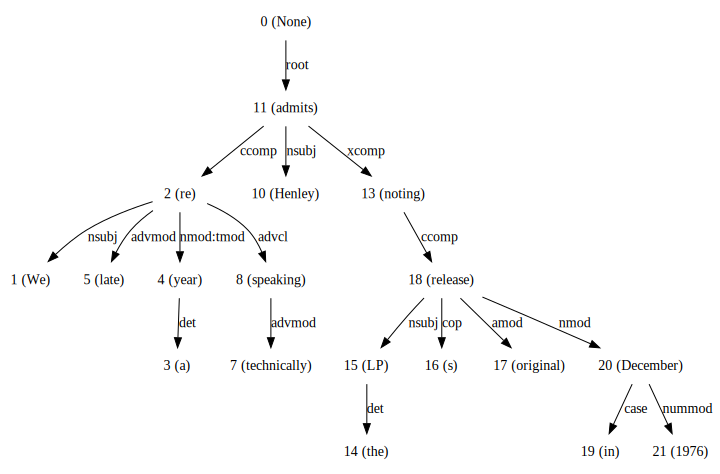

In [129]:
try:
    secondSentGraph = graphviz.Source(secondSentDepParseTree.to_dot())
except:
    secondSentGraph = None
    print("There was a problem with graphviz, likely your missing the program, https://www.graphviz.org/download/")
secondSentGraph

In [130]:
topPostDepParse = list(stanford.depParser.parse_sents(redditTopScores['sentences'][0]))

In [131]:
targetSentence = 7
print(' '.join(redditTopScores['sentences'][0][targetSentence]))

`` We 're taking it one step at a time , '' Henley says of the reborn lineup with country star Vince Gill and Frey 's 23-year-old son Deacon on guitars and vocals .


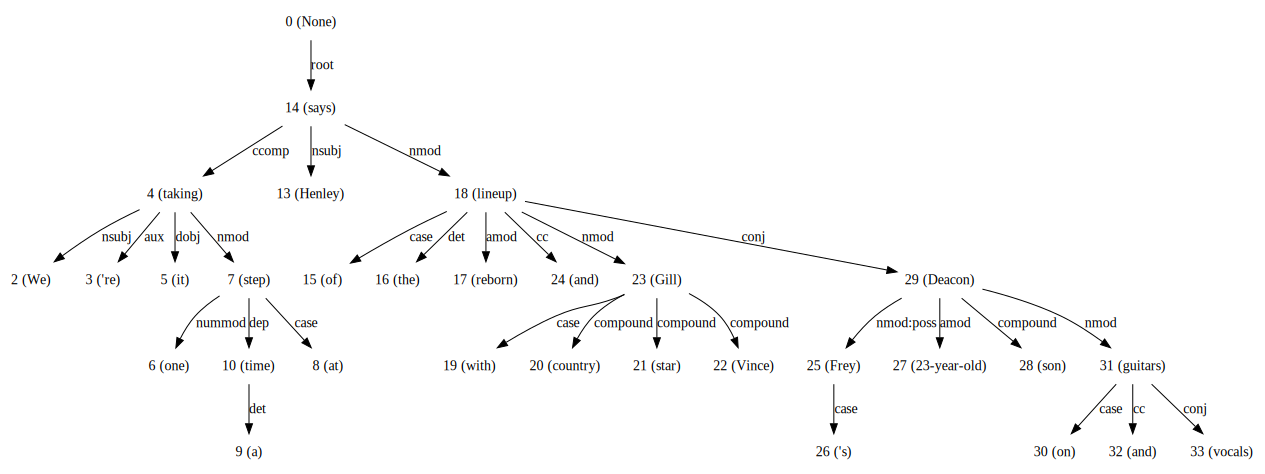

In [132]:
try:
    graph = graphviz.Source(list(topPostDepParse[targetSentence])[0].to_dot())
except IndexError:
    print("You likely have to rerun the depParses")
    raise
except:
    graph = None
    print("There was a problem with graphviz, likely your missing the program, https://www.graphviz.org/download/")
graph



In [134]:
text = all_sentences
ieDF = stanford.openIE(text)

Starting OpenIE run
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/english-left3words/english-left3words-distsim.tagger ... done [1.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator depparse
[main] INFO edu.stanford.nlp.parser.nndep.DependencyParser - Loading depparse model file: edu/stanford/nlp/models/parser/nndep/english_UD.gz ... 
[main] INFO edu.stanford.nlp.parser.nndep.Classifier - PreComputed 99996, Elapsed Time: 16.883 (s)
[main] INFO edu.stanford.nlp.parser.nndep.DependencyParser - Initializing dependency parser ... done [18.5 sec].
[main] INFO edu.stanford.nlp.pip

In [135]:
ieDF

,certainty,subject,verb,object
0,1.000000,Eagles singer-drummer Don Henley,says of,unissued concert recordings from October 1976 ...
1,1.000000,Eagles singer-drummer Don Henley,says of,concert recordings from October 1976 at Forum ...
2,1.000000,Eagles singer-drummer Don Henley,says of,previously unissued concert recordings from Oc...
3,1.000000,Eagles singer-drummer Don Henley,says of,previously unissued concert recordings at Foru...
4,1.000000,Eagles singer-drummer Don Henley,says of,unissued concert recordings at Forum added to ...
5,1.000000,Eagles singer-drummer Don Henley,says of,concert recordings from October 1976 at Forum ...
6,1.000000,Eagles singer-drummer Don Henley,says of,previously unissued concert recordings added t...
7,1.000000,Eagles singer-drummer Don Henley,says of,concert recordings at Forum added to 40th-anni...
8,1.000000,Eagles singer-drummer Don Henley,says of,concert recordings
9,1.000000,Eagles singer-drummer Don Henley,says of,concert recordings added to 40th-anniversary r...


In [136]:
len(redditTopScores['sentences'][0])

131

In [137]:
sum([len(s) for s in redditTopScores['sentences'][0]])

2242

In [138]:
ieDF['subject'].value_counts()

Eagles singer-drummer Don Henley    141
I                                    35
It                                   34
it                                   31
We                                   28
we                                   27
He                                   26
you                                  19
They                                 14
he                                   10
Gill                                 10
didn t                                8
show                                  6
Everyone                              6
past                                  6
Lyin Eyes                             6
d                                     6
they                                  6
Long Run                              5
Glenn                                 5
People                                4
t                                     4
Deacon                                4
Henley                                4
Elvis Presley                         4


In [139]:
ieDF[ieDF['subject'] == 'I']['object'].value_counts()

it                              2
them                            2
craftsmanship                   1
work with him in summertime     1
editing on solos                1
refer to it as craftsmanship    1
refer                           1
summertime                      1
work in summertime              1
being                           1
something                       1
editing                         1
past July                       1
Hayride                         1
70                              1
something night                 1
my dad                          1
perfectionism                   1
my way                          1
t                               1
time                            1
solos                           1
something onstage last night    1
props                           1
something onstage night         1
refer to it                     1
whole time                      1
surprised                       1
refer as craftsmanship          1
work          

# Auxilliary Functions

In [150]:
def make_wc(sortedTargets):
    bag = sortedTargets
    d = {}
    for a, x in bag:
        d[a] = x

    wordcloud = WordCloud()
    wordcloud.generate_from_frequencies(frequencies=d)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
def top_20(a):
    countTarget = a
    targetCounts = {}
    for entry in redditTopScores['POS_sents']:
        for sentence in entry:
            for ent, kind in sentence:
                if kind != countTarget:
                    continue
                elif ent in targetCounts:
                    targetCounts[ent] += 1
                else:
                    targetCounts[ent] = 1
    sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
    return sortedTargets

# -*- coding: utf-8 -*-
import re
caps = "([A-Z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov)"

def split_into_sentences(text):
    text = " " + text + "  "
    text = text.replace("\n"," ")
    text = re.sub(prefixes,"\\1<prd>",text)
    text = re.sub(websites,"<prd>\\1",text)
    if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
    text = re.sub("\s" + caps + "[.] "," \\1<prd> ",text)
    text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
    text = re.sub(caps + "[.]" + caps + "[.]" + caps + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
    text = re.sub(caps + "[.]" + caps + "[.]","\\1<prd>\\2<prd>",text)
    text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
    text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
    text = re.sub(" " + caps + "[.]"," \\1<prd>",text)
    if "”" in text: text = text.replace(".”","”.")
    if "\"" in text: text = text.replace(".\"","\".")
    if "!" in text: text = text.replace("!\"","\"!")
    if "?" in text: text = text.replace("?\"","\"?")
    text = text.replace(".",".<stop>")
    text = text.replace("?","?<stop>")
    text = text.replace("!","!<stop>")
    text = text.replace("<prd>",".")
    sentences = text.split("<stop>")
    sentences = sentences[:-1]
    sentences = [s.strip() for s in sentences]
    return sentences